In [1]:
from mflex.simulate.simulate_boundary import dipole, dipole_large
import numpy as np
from mflex.model.field.bfield_model import (
    magnetic_field,
)
from mflex.plot.plot_magnetogram import (
    plot_fieldlines_polar,
    plot_fieldlines_polar_large,
)
from mflex.plot.plot_plasma_parameters import plot_deltaparam
import matplotlib.pyplot as plt
from mflex.model.plasma_parameters import (
    bpressure,
    bdensity,
    btemp,
    deltapres,
    deltaden,
    pres,
    den,
    temp,
    deltaden_low,
    deltapres_low,
)
from mflex.model.field.utility.height_profile import f_low, f

0.0 0.0 0.0
10.0 10.0 2.0
0.05 0.05 0.006666666666666667
Atmospheric z0 0.2
Atmospheric Delta z 0.02
Magnetic field z0 0.2
Magnetic field Delta z 0.04
Temperature Photosphere 5600.0
Temperature Corona 2000000.0
T0 1002799.9979446176
T1 997200.0020553825
g 274.0
mbar 1.6726200000000002e-27
Pressure Scale height z0 3.020993277041208
Pressure Scale height photosphere 0.016870325474776363
Plasma Density Photosphere 0.00030000000000000003
Magnetic field strength Photosphere 100.0
Plasma Pressure Photosphere 13867.407540266171
Magnetic Pressure Photosphere 39.7887358184391
Plasma Beta 348.52596482443823
Density scaling 10329.556633200002
z0, deltaz, h, t0, t1 0.2 0.02 3.020993277041208 1002799.9979446176 997200.0020553825


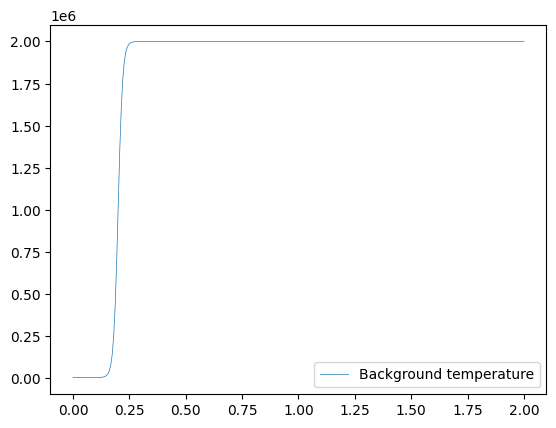

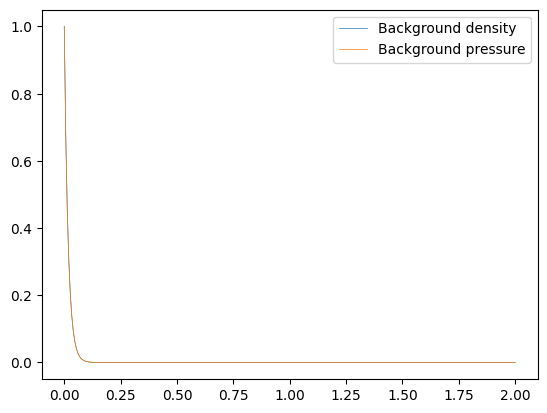

In [2]:
nresol_x = 200
nresol_y = 200
nresol_z = 300
xmin = 0.0
xmax = 10.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 10.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z
nf_max = 200
L = 1.0
print(xmin, ymin, zmin)
print(xmax, ymax, zmax)
print(pixelsize_x, pixelsize_y, pixelsize_z)

# Background atmosphere parameters
z0 = 0.2
deltaz = 0.02

# Height profile f parameters
a = 0.14
alpha = 0.1
b = 1.0

# Magnitc field parameters
z0_b = 0.2
deltaz_b = 0.04
a_low = a * (1 - np.tanh(-z0_b / deltaz_b))
kappa = 1.0 / z0_b
deltaz_low = 2.0 / kappa

# Fieldline3D parameters
h1 = 0.01  # Initial step length for fieldline3D
eps = 1.0e-8
# Tolerance to which we require point on field line known for fieldline3D
hmin = 0.0  # Minimum step length for fieldline3D
hmax = 1.0  # Maximum step length for fieldline3D

print("Atmospheric z0", z0)
print("Atmospheric Delta z", deltaz)
print("Magnetic field z0", z0_b)
print("Magnetic field Delta z", deltaz_b)

t_photosphere = 5600.0  # Temperature at z = 0 (on photosphere) in Kelvin
t_corona = 2.0 * 10.0**6  # Temperature at z = 2.0 (at 20 Mm) in Kelvin
t0 = (t_photosphere + t_corona * np.tanh(z0 / deltaz)) / (
    1.0 + np.tanh(z0 / deltaz)
)  # Temperature at z = z0 in Kelvin
t1 = (t_corona - t_photosphere) / (
    1.0 + np.tanh(z0 / deltaz)
)  # t_corona - t0 in Kelvin
g_solar = 274.0  # gravitational acceleration in m/s^2
kB = 1.380649 * 10**-23  # Boltzmann constant in Joule/ Kelvin = kg m^2/(Ks^2)
mbar = 1.67262 * 10**-27  # mean molecular weight (proton mass)
h = (
    kB * t0 / (mbar * g_solar) * 10**-6 * 10**-1
)  # pressure scale height in 10^4 km (10**-6 to convert to Mm, and 10**-1 to convert to 10Mm = 10^4 km)
rho0 = 3.0 * 10**-4  # plasma density at z = 0 in kg/(m^3)
b0 = 100.0  # Gauss background magnetic field strength in 10^-4 kg/(s^2A) = 10^-4 T
p0 = t_photosphere * kB * rho0 / mbar  # plasma pressure in kg/(s^2 m)
mu0 = 1.25663706 * 10**-6  # permeability of free space in mkg/(s^2A^2)
pB0 = (b0 * 10**-4) ** 2 / (2 * mu0)  # magnetic pressure b0**2 / 2mu0 in kg/(s^2m)
beta0 = p0 / pB0  # Plasma Beta, ration plasma to magnetic pressure
h_photo = h / t0 * t_photosphere

print("Temperature Photosphere", t_photosphere)
print("Temperature Corona", t_corona)
print("T0", t0)
print("T1", t1)
print("g", g_solar)
print("mbar", mbar)
print("Pressure Scale height z0", h)
print("Pressure Scale height photosphere", h_photo)
print("Plasma Density Photosphere", rho0)
print("Magnetic field strength Photosphere", b0)
print("Plasma Pressure Photosphere", p0)
print("Magnetic Pressure Photosphere", pB0)
print("Plasma Beta", beta0)
print("Density scaling", 0.5 * beta0 / h * t0 / t_photosphere)

z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

backpres = 0.0 * z_arr
backtemp = 0.0 * z_arr
backden = 0.0 * z_arr
print("z0, deltaz, h, t0, t1", z0, deltaz, h, t0, t1)
for iz in range(nresol_z):
    z = z_arr[iz]
    backpres[iz] = bpressure(z, z0, deltaz, h, t0, t1)
    backden[iz] = bdensity(z, z0, deltaz, h, t0, t1)
    backtemp[iz] = btemp(z, z0, deltaz, t0, t1)
plt.plot(z_arr, backtemp, label="Background temperature", linewidth=0.5)
plt.legend()
plt.show()
plt.plot(z_arr, backden, label="Background density", linewidth=0.5)
plt.plot(z_arr, backpres, label="Background pressure", linewidth=0.5)
plt.legend()
plt.show()

In [3]:
length_scale = 2.0 * L  # Normalising length scale for Seehafer

length_scale_x = 2.0 * nresol_x * pixelsize_x * L
length_scale_y = 2.0 * nresol_y * pixelsize_y * L

# Length scale in y direction for Seehafer
length_scale_x_norm = length_scale_x / length_scale
# Normalised length scale in x direction for Seehafer
length_scale_y_norm = length_scale_y / length_scale
# Normalised length scale in y direction for Seehafer

x_arr = np.arange(2.0 * nresol_x) * 2.0 * xmax / (2.0 * nresol_x - 1) - xmax
y_arr = np.arange(2.0 * nresol_y) * 2.0 * ymax / (2.0 * nresol_y - 1) - ymax
z_arr = np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin

ratiodzls = deltaz / length_scale  # Normalised deltaz

# kx, ky arrays, coefficients for x and y in Fourier series

kx_arr = np.arange(nf_max) * np.pi / length_scale_x_norm  # [0:nf_max]

ky_arr = np.arange(nf_max) * np.pi / length_scale_y_norm  # [0:nf_max]

one_arr = 0.0 * np.arange(nf_max) + 1.0

ky_grid = np.outer(ky_arr, one_arr)  # [0:nf_max, 0:nf_max]
kx_grid = np.outer(one_arr, kx_arr)  # [0:nf_max, 0:nf_max]

# kx^2 + ky^2

k2_arr = np.outer(ky_arr**2, one_arr) + np.outer(one_arr, kx_arr**2)
k2_arr[0, 0] = (np.pi / length_scale) ** 2

print(k2_arr.min())

print((k2_arr.min() - (2 * alpha) ** 2.0) / (2 * k2_arr.min()))

0.09869604401089357
0.2973576327153244


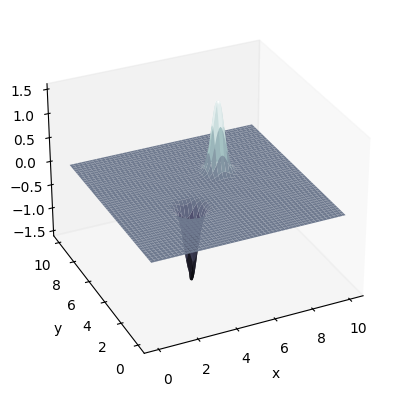

In [4]:
x_arr = np.arange(nresol_x) * (xmax - xmin) / (nresol_x - 1) + xmin
y_arr = np.arange(nresol_y) * (ymax - ymin) / (nresol_y - 1) + ymin
x_plot = np.outer(y_arr, np.ones(nresol_x))
y_plot = np.outer(x_arr, np.ones(nresol_y)).T

data_bz = np.zeros((nresol_y, nresol_x))
data_bz_test = np.zeros((nresol_y, nresol_x))
"""mu_x1 = 1.2 / np.pi + 1.0
mu_y1 = mu_x1
mu_x2 = -mu_x1
mu_y2 = -mu_y1
kappa_x1 = 75.0
kappa_y1 = kappa_x1
kappa_x2 = kappa_y1
kappa_y2 = kappa_x1

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]
        xx = np.pi * (x / 5.0 - 1.0)
        yy = np.pi * (y / 5.0 - 1.0)

        data_bz[iy, ix] = np.exp(kappa_x1 * np.cos(xx - mu_x1)) / (
                2.0 * np.pi * np.i0(kappa_x1)
            ) * np.exp(kappa_y1 * np.cos(yy - mu_y1)) / (
                2.0 * np.pi * np.i0(kappa_y1)
            ) - np.exp(
                kappa_x2 * np.cos(xx - mu_x2)
            ) / (
                2.0 * np.pi * np.i0(kappa_x2)
            ) * np.exp(
                kappa_y2 * np.cos(yy - mu_y2)
            ) / (
                2.0 * np.pi * np.i0(kappa_y2))
      

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, data_bz, cmap="bone")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, -115, 0)
ax.grid(False)
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure2a.png"
# plt.savefig(plotname, dpi=300)
plt.show()"""

for ix in range(0, nresol_x):
    for iy in range(0, nresol_y):
        x = x_arr[ix]
        y = y_arr[iy]

        data_bz_test[iy, ix] = dipole_large(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, data_bz_test, cmap="bone")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, -115, 0)
ax.grid(False)
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure2a.png"
# plt.savefig(plotname, dpi=300)
plt.show()

In [5]:
bfield, dbfield = magnetic_field(
    data_bz_test,
    z0_b,
    deltaz,
    a,
    b,
    alpha,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

length scale 2.0
length scale x 20.0
length scale y 20.0
length scale x norm 10.0
length scale y norm 10.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 10.0 0.0 10.0 0.0 2.0


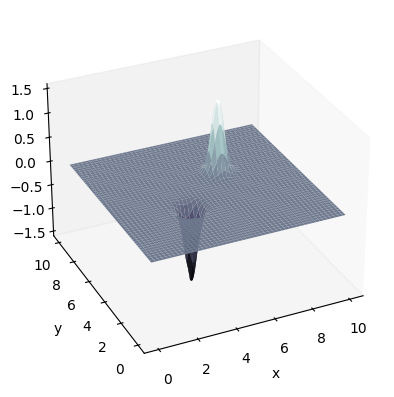

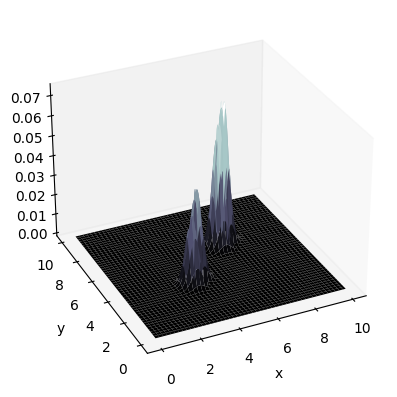

In [6]:
b_back = np.zeros((2 * nresol_y, 2 * nresol_x))
b_back = bfield[nresol_y : 2 * nresol_y, nresol_x : 2 * nresol_x, 0, 2]

# Figure 2b

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, b_back, cmap="bone")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, -115, 0)
ax.grid(False)
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure2b.png"
# plt.savefig(plotname, dpi=300)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(y_plot, x_plot, abs(data_bz_test - b_back), cmap="bone")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.view_init(30, -115, 0)
ax.grid(False)
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure2b.png"
# plt.savefig(plotname, dpi=300)
plt.show()

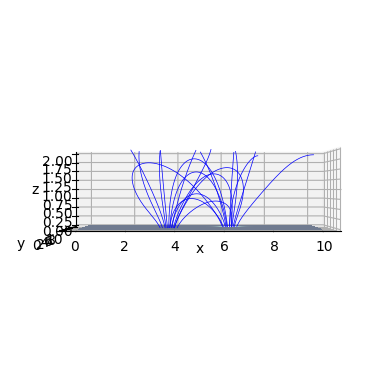

In [7]:
plot_fieldlines_polar_large(
    bfield,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a,
    b,
    alpha,
    nf_max,
    name="paper_test",
)

length scale 2.0
length scale x 20.0
length scale y 20.0
length scale x norm 10.0
length scale y norm 10.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 10.0 0.0 10.0 0.0 2.0
length scale 2.0
length scale x 20.0
length scale y 20.0
length scale x norm 10.0
length scale y norm 10.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 10.0 0.0 10.0 0.0 2.0
length scale 2.0
length scale x 20.0
length scale y 20.0
length scale x norm 10.0
length scale y norm 10.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 10.0 0.0 10.0 0.0 2.0
length scale 2.0
length scale x 20.0
length scale y 20.0
length scale x norm 10.0
length scale y norm 10.0
xmin, xmax, ymin, ymax, zmin, zmax  0.0 10.0 0.0 10.0 0.0 2.0


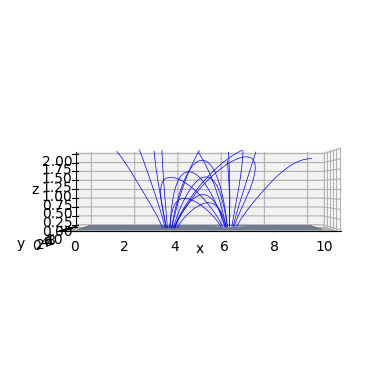

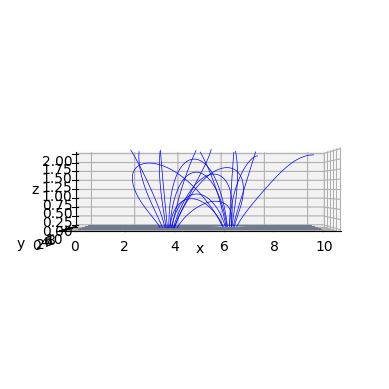

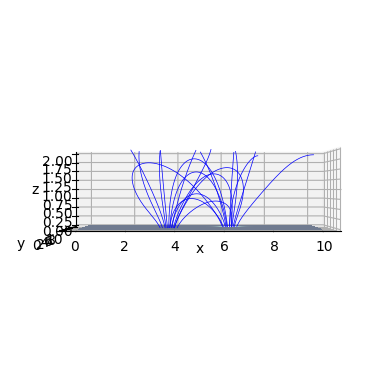

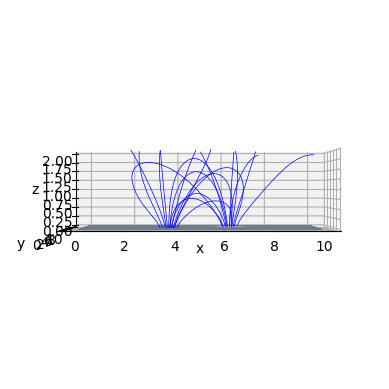

'plot_fieldlines_polar_large(\n    bfield6,\n    h1,\n    hmin,\n    hmax,\n    eps,\n    nresol_x,\n    nresol_y,\n    nresol_z,\n    -xmax,\n    xmax,\n    -ymax,\n    ymax,\n    zmin,\n    zmax,\n    a6,\n    b,\n    alpha6,\n    nf_max,\n    name="6",\n)\n\nplot_fieldlines_polar_large(\n    bfield7,\n    h1,\n    hmin,\n    hmax,\n    eps,\n    nresol_x,\n    nresol_y,\n    nresol_z,\n    -xmax,\n    xmax,\n    -ymax,\n    ymax,\n    zmin,\n    zmax,\n    a7,\n    b,\n    alpha7,\n    nf_max,\n    name="7",\n)\n\nplot_fieldlines_polar_large(\n    bfield8,\n    h1,\n    hmin,\n    hmax,\n    eps,\n    nresol_x,\n    nresol_y,\n    nresol_z,\n    -xmax,\n    xmax,\n    -ymax,\n    ymax,\n    zmin,\n    zmax,\n    a8,\n    b,\n    alpha8,\n    nf_max,\n    name="8",\n)'

In [8]:
a0 = 0.0
alpha0 = 0.0

"""a1 = 0.24
alpha1 = 0.0

a2 = 0.48
alpha2 = 0.0"""

a3 = 0.0
alpha3 = 0.1

a4 = 0.14
alpha4 = 0.1

a5 = 0.28
alpha5 = 0.1

"""a6 = 0.0
alpha6 = 0.3

a7 = 0.022
alpha7 = 0.3

a8 = 0.044
alpha8 = 0.3"""

bfield0, dbfield0 = magnetic_field(
    data_bz_test,
    z0_b,
    deltaz,
    a0,
    b,
    alpha0,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

"""bfield1, dbfield1 = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a1,
    b,
    alpha1,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
)

bfield2, dbfield2 = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a2,
    b,
    alpha2,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
)"""

bfield3, dbfield3 = magnetic_field(
    data_bz_test,
    z0_b,
    deltaz_b,
    a3,
    b,
    alpha3,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

bfield4, dbfield4 = magnetic_field(
    data_bz_test,
    z0_b,
    deltaz_b,
    a4,
    b,
    alpha4,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

bfield5, dbfield5 = magnetic_field(
    data_bz_test,
    z0_b,
    deltaz_b,
    a5,
    b,
    alpha5,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
    L,
)

"""bfield6, dbfield6 = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a6,
    b,
    alpha6,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
)
bfield7, dbfield7 = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a7,
    b,
    alpha7,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
)

bfield8, dbfield8 = magnetic_field(
    data_bz,
    z0_b,
    deltaz_b,
    a8,
    b,
    alpha8,
    xmin,
    xmax,
    ymin,
    ymax,
    zmin,
    zmax,
    nresol_x,
    nresol_y,
    nresol_z,
    pixelsize_x,
    pixelsize_y,
    nf_max,
)"""

plot_fieldlines_polar_large(
    bfield0,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a0,
    b,
    alpha0,
    nf_max,
    name="0",
)

"""plot_fieldlines_polar_large(
    bfield1,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a1,
    b,
    alpha1,
    nf_max,
    name="1",
)

plot_fieldlines_polar_large(
    bfield2,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a2,
    b,
    alpha2,
    nf_max,
    name="2",
)"""

plot_fieldlines_polar_large(
    bfield3,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a3,
    b,
    alpha3,
    nf_max,
    name="3",
)

plot_fieldlines_polar_large(
    bfield4,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a4,
    b,
    alpha4,
    nf_max,
    name="4",
)

plot_fieldlines_polar_large(
    bfield5,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a5,
    b,
    alpha5,
    nf_max,
    name="5",
)

"""plot_fieldlines_polar_large(
    bfield6,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a6,
    b,
    alpha6,
    nf_max,
    name="6",
)

plot_fieldlines_polar_large(
    bfield7,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a7,
    b,
    alpha7,
    nf_max,
    name="7",
)

plot_fieldlines_polar_large(
    bfield8,
    h1,
    hmin,
    hmax,
    eps,
    nresol_x,
    nresol_y,
    nresol_z,
    -xmax,
    xmax,
    -ymax,
    ymax,
    zmin,
    zmax,
    a8,
    b,
    alpha8,
    nf_max,
    name="8",
)"""

Pressure minimum mhs1 2.358330823306755
Pressure minimum mhs2 2.358330823306755
Density minimum mhs1 1.4285279247945513e-09
Density minimum mhs2 1.4285279247945513e-09


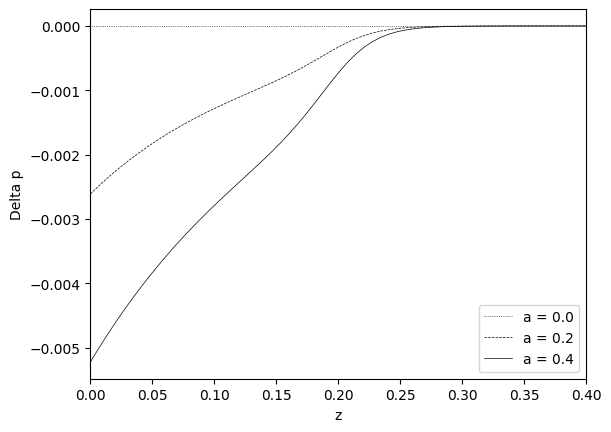

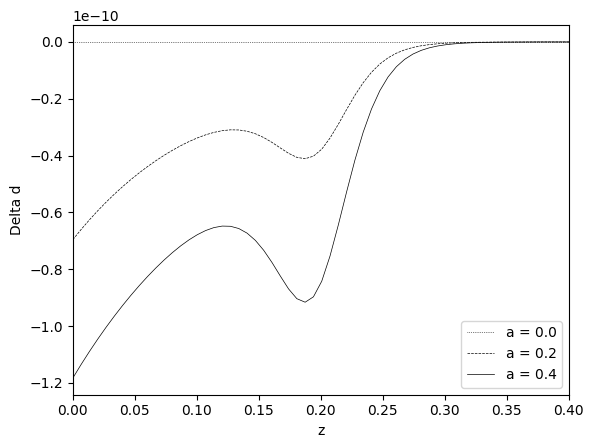

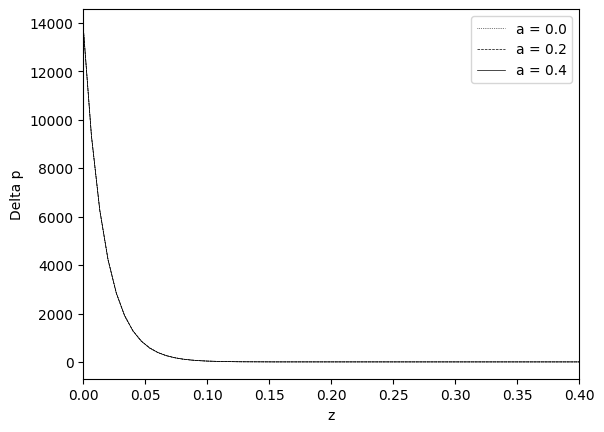

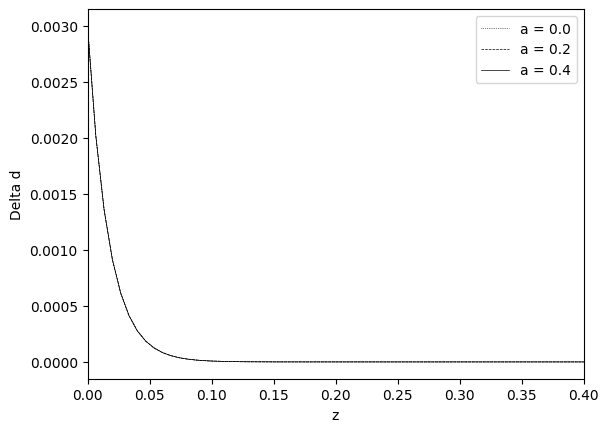

In [9]:
maxcoord = np.unravel_index(np.argmax(b_back, axis=None), b_back.shape)
iy = int(maxcoord[0])
ix = int(maxcoord[1])
backpres = 0.0 * z_arr
backden = 0.0 * z_arr
dpres1 = 0.0 * z_arr
dden1 = 0.0 * z_arr
dpres2 = 0.0 * z_arr
dden2 = 0.0 * z_arr
dpres3 = 0.0 * z_arr
dden3 = 0.0 * z_arr

for iz in range(nresol_z):
    z = z_arr[iz]

    bz1 = bfield3[nresol_y + iy, nresol_x + ix, iz, 2]
    bzdotgradbz1 = (
        dbfield3[nresol_y + iy, nresol_x + ix, iz, 1]
        * bfield3[nresol_y + iy, nresol_x + ix, iz, 1]
        + dbfield3[nresol_y + iy, nresol_x + ix, iz, 0]
        * bfield3[nresol_y + iy, nresol_x + ix, iz, 0]
        + dbfield3[nresol_y + iy, nresol_x + ix, iz, 2]
        * bfield3[nresol_y + iy, nresol_x + ix, iz, 2]
    )

    bz2 = bfield4[nresol_y + iy, nresol_x + ix, iz, 2]
    bzdotgradbz2 = (
        dbfield4[nresol_y + iy, nresol_x + ix, iz, 1]
        * bfield4[nresol_y + iy, nresol_x + ix, iz, 1]
        + dbfield4[nresol_y + iy, nresol_x + ix, iz, 0]
        * bfield4[nresol_y + iy, nresol_x + ix, iz, 0]
        + dbfield4[nresol_y + iy, nresol_x + ix, iz, 2]
        * bfield4[nresol_y + iy, nresol_x + ix, iz, 2]
    )

    bz3 = bfield5[nresol_y + iy, nresol_x + ix, iz, 2]
    bzdotgradbz3 = (
        dbfield5[nresol_y + iy, nresol_x + ix, iz, 1]
        * bfield5[nresol_y + iy, nresol_x + ix, iz, 1]
        + dbfield5[nresol_y + iy, nresol_x + ix, iz, 0]
        * bfield5[nresol_y + iy, nresol_x + ix, iz, 0]
        + dbfield5[nresol_y + iy, nresol_x + ix, iz, 2]
        * bfield5[nresol_y + iy, nresol_x + ix, iz, 2]
    )

    backpres[iz] = (
        b0**2.0 / mu0 * 0.5 * beta0 * 10**-8 * bpressure(z, z0, deltaz, h, t0, t1)
    )
    backden[iz] = (
        0.5
        * beta0
        / h
        * t0
        / t_photosphere
        * b0**2.0
        / (mu0 * g_solar * L)
        * 10**-14
        * bdensity(z, z0, deltaz, h, t0, t1)
    )

    dpres1[iz] = deltapres(z, z0_b, deltaz_b, a3, b, bz1) / mu0 * 10**-8
    dden1[iz] = (
        deltaden(z, z0_b, deltaz_b, a3, b, bz1, bzdotgradbz1)
        / (mu0 * g_solar)
        * 10**-14
    )
    dpres2[iz] = deltapres(z, z0_b, deltaz_b, a4, b, bz2) / mu0 * 10**-8
    dden2[iz] = (
        deltaden(z, z0_b, deltaz_b, a4, b, bz2, bzdotgradbz2)
        / (mu0 * g_solar)
        * 10**-14
    )
    dpres3[iz] = deltapres(z, z0_b, deltaz_b, a5, b, bz3) / mu0 * 10**-8
    dden3[iz] = (
        deltaden(z, z0_b, deltaz_b, a5, b, bz3, bzdotgradbz3)
        / (mu0 * g_solar)
        * 10**-14
    )

print("Pressure minimum mhs1", min(backpres + dpres2))
print("Pressure minimum mhs2", min(backpres + dpres3))
print(
    "Density minimum mhs1", min(backden + dden2)
)
print(
    "Density minimum mhs2", min(backden + dden3)
)
plt.plot(
    z_arr, dpres1, label="a = 0.0", linewidth=0.5, color="black", linestyle="dotted"
)
plt.plot(
    z_arr,
    dpres2,
    label="a = 0.2",
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.plot(
    z_arr,
    dpres3,
    label="a = 0.4",
    linewidth=0.5,
    color="black",
    linestyle="solid",
)
plt.legend()
plt.xlabel("z")
plt.ylabel("Delta p")
plt.xlim([0.0, 2 * z0_b])
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure7a.png"
# plt.savefig(plotname, dpi=300)
plt.show()

plt.plot(
    z_arr, dden1, label="a = 0.0", linewidth=0.5, color="black", linestyle="dotted"
)
plt.plot(
    z_arr,
    dden2,
    label="a = 0.2",
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.plot(
    z_arr,
    dden3,
    label="a = 0.4",
    linewidth=0.5,
    color="black",
    linestyle="solid",
)
plt.legend()
plt.xlabel("z")
plt.ylabel("Delta d")
plt.xlim([0.0, 2 * z0_b])
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure7b.png"
# plt.savefig(plotname, dpi=300)
plt.show()

plt.plot(
    z_arr,
    backpres + dpres1,
    label="a = 0.0",
    linewidth=0.5,
    color="black",
    linestyle="dotted",
)
plt.plot(
    z_arr,
    backpres + dpres2,
    label="a = 0.2",
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.plot(
    z_arr,
    backpres + dpres3,
    label="a = 0.4",
    linewidth=0.5,
    color="black",
    linestyle="solid",
)
plt.legend()
plt.xlabel("z")
plt.ylabel("Delta p")
plt.xlim([0.0, 2 * z0_b])
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure7a.png"
# plt.savefig(plotname, dpi=300)
plt.show()

plt.plot(
    z_arr,
    backden + dden1,
    label="a = 0.0",
    linewidth=0.5,
    color="black",
    linestyle="dotted",
)
plt.plot(
    z_arr,
    backden + dden2,
    label="a = 0.2",
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.plot(
    z_arr,
    backden + dden3,
    label="a = 0.4",
    linewidth=0.5,
    color="black",
    linestyle="solid",
)
plt.legend()
plt.xlabel("z")
plt.ylabel("Delta d")
plt.xlim([0.0, 2 * z0_b])
# plotname = "/Users/lilli/Desktop/mflex/nw2019_paper/figure7b.png"
# plt.savefig(plotname, dpi=300)
plt.show()

In [10]:
fpres_3d = np.zeros((nresol_z, nresol_y, nresol_x))
fden_3d = np.zeros((nresol_z, nresol_y, nresol_x))

for ix in range(nresol_x):
    for iy in range(nresol_y):
        for iz in range(nresol_z):
            z = z_arr[iz]
            bz = bfield4[nresol_y + iy, nresol_x + ix, iz, 2]
            bzdotgradbz = (
                dbfield4[nresol_y + iy, nresol_x + ix, iz, 1]
                * bfield4[nresol_y + iy, nresol_x + ix, iz, 1]
                + dbfield4[nresol_y + iy, nresol_x + ix, iz, 0]
                * bfield4[nresol_y + iy, nresol_x + ix, iz, 0]
                + dbfield4[nresol_y + iy, nresol_x + ix, iz, 2]
                * bfield4[nresol_y + iy, nresol_x + ix, iz, 2]
            )
            fpres_3d[iz, iy, ix] = (
                b0**2.0
                / mu0
                * 0.5
                * beta0
                * bpressure(z, z0, deltaz, h, t0, t1)
                * 10**-8
                + deltapres(z, z0_b, deltaz_b, a4, b, bz) / mu0 * 10**-8
            )
            fden_3d[iz, iy, ix] = (
                0.5
                * beta0
                / h
                * t0
                / t_photosphere
                * b0**2.0
                / (mu0 * g_solar * L)
                * bdensity(z, z0, deltaz, h, t0, t1)
                * 10**-14
                + deltaden(z, z0_b, deltaz_b, a4, b, bz, bzdotgradbz)
                / (mu0 * g_solar)
                * 10**-14
            )

print("Pressure minimum lin", fpres_3d.min())
print("Pressure minimum lin", fpres_3d.argmin())
print("Density minimum lin", fden_3d.min())
print("Density minimum lin", fden_3d.argmin())

Pressure minimum lin 2.358330823306755
Pressure minimum lin 11960000
Density minimum lin 1.4285279247945513e-09
Density minimum lin 11960000


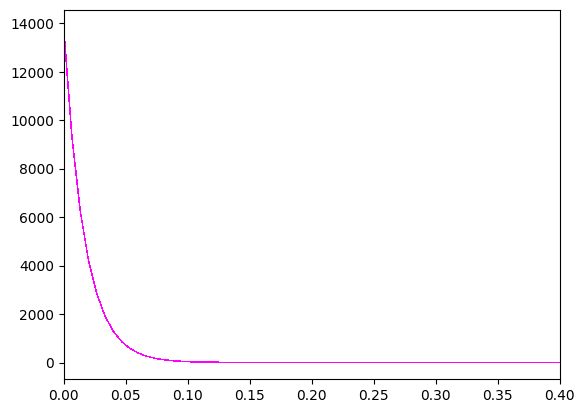

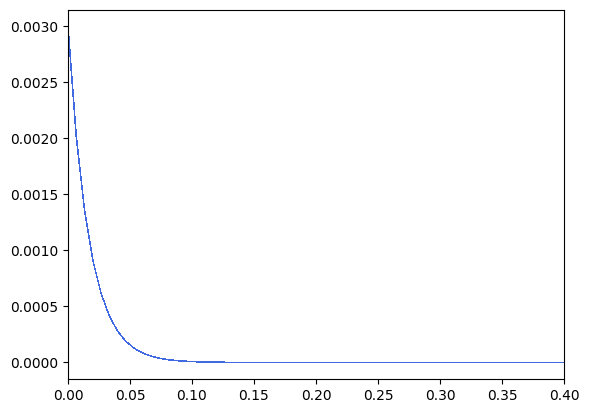

In [11]:
for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        plt.plot(
            z_arr, fpres_3d[:, iy, ix], linewidth=0.5, color="magenta", alpha=0.04
        )
plt.xlim([0, 2*z0])
plt.show()

for ix in range(0, nresol_x, 1):
    for iy in range(0, nresol_y, 1):
        plt.plot(
            z_arr, fden_3d[:, iy, ix], linewidth=0.5, color="royalblue", alpha=0.04
        )
plt.xlim([0, 2*z0])
plt.show()